<a href="https://colab.research.google.com/github/ussalbt/deep-learning-with-python/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)c%C3%B6z%C3%BCm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [33]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [10]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [11]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [12]:
X_train[5].shape

(28, 28)

In [13]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

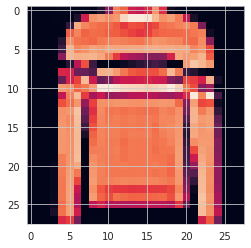

In [15]:
plt.imshow(X_train[5]);
# plt.matshow(X_train[5]);

In [16]:
y_train[5]

2

In [17]:
y_train.shape

(60000,)

In [18]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [38]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


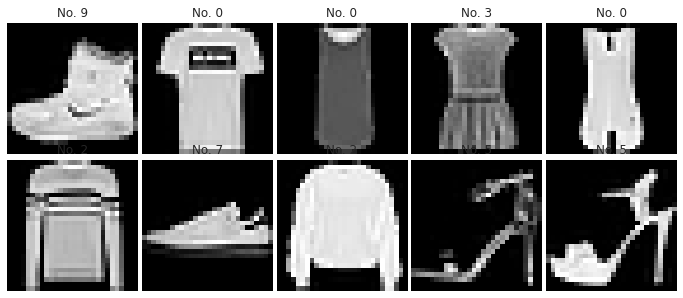

In [90]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [34]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [35]:
y_train[0]

9

In [39]:
classes[int(y_train[0])]

'Ankle boot'

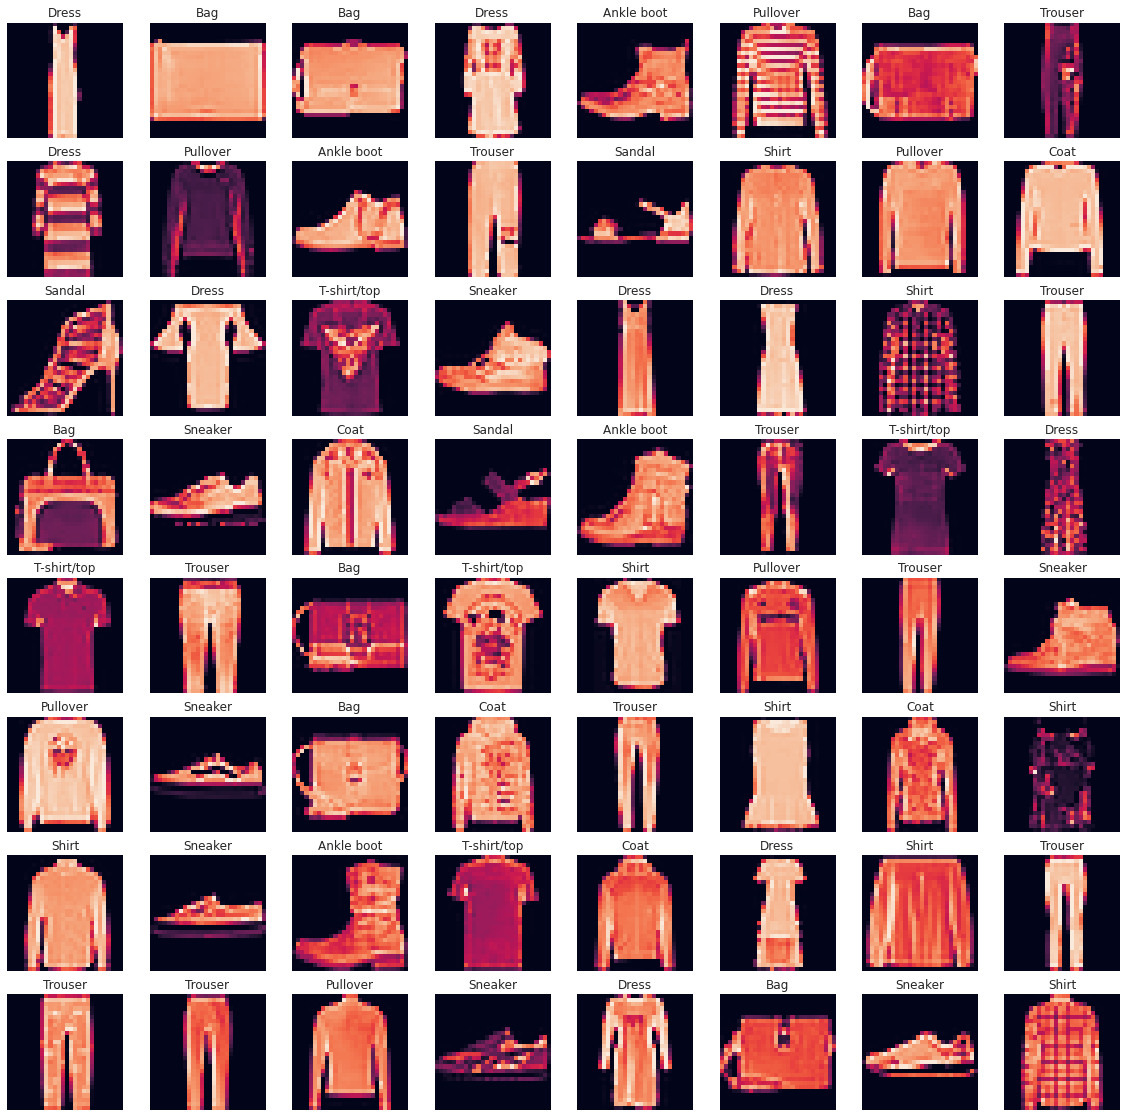

In [40]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [41]:
X_train[5].min()

0

In [42]:
X_train[5].max()

255

In [43]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [44]:
X_train[5].min()

0.0

In [45]:
X_train[5].max()

1.0

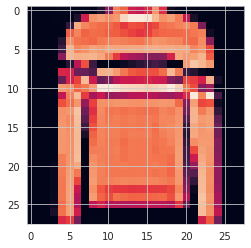

In [52]:
plt.imshow(X_train[5]);

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [47]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [91]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [92]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [93]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [48]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [94]:
y_train.shape


(60000,)

In [95]:
from tensorflow.keras.utils import to_categorical

In [96]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [98]:
y_train[5]

2

In [99]:
Y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [101]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu',strides=(1,1))) #  padding = valid 

model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [102]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 13, 13, 28)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 4732)              0         
                                                                 
 dense_36 (Dense)            (None, 128)               605824    
                                                                 
 dense_37 (Dense)            (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_______________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [103]:
from tensorflow.keras.callbacks import EarlyStopping

In [104]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [105]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.3915 - accuracy: 0.8601 - val_loss: 0.3326 - val_accuracy: 0.8805
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2678 - accuracy: 0.9040 - val_loss: 0.2819 - val_accuracy: 0.8932
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2251 - accuracy: 0.9170 - val_loss: 0.2626 - val_accuracy: 0.9044
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1907 - accuracy: 0.9294 - val_loss: 0.2575 - val_accuracy: 0.9088
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1626 - accuracy: 0.9396 - val_loss: 0.2581 - val_accuracy: 0.9095
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1392 - accuracy: 0.9493 - val_loss: 0.2412 - val_accuracy: 0.9184
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1192 - accuracy: 0.9569 - val_loss: 0.2763 -

In [106]:
model.metrics_names

['loss', 'accuracy']

In [107]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.392,0.860,0.333,0.881
1,0.268,0.904,0.282,0.893
2,0.225,0.917,0.263,0.904
3,0.191,0.929,0.258,0.909
4,0.163,0.940,0.258,0.910


**TASK 7: Plot values of metrics you used in your model.**

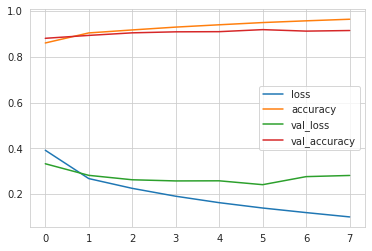

In [108]:
summary.plot();

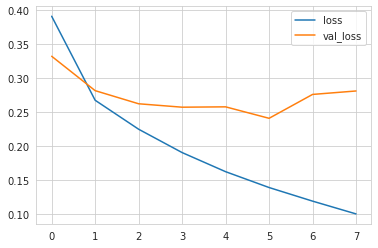

In [109]:
summary[["loss", "val_loss"]].plot();

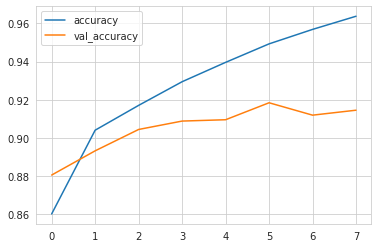

In [110]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [111]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [112]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.2412 - accuracy: 0.9184


[0.2411811500787735, 0.91839998960495]

In [113]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2411811500787735
Test accuracy: 0.91839998960495


In [114]:
pred_prob = model.predict(X_test)
pred_prob

array([[5.2061787e-06, 1.2019767e-10, 3.9955166e-06, ..., 9.8375422e-05,
        5.7773980e-07, 9.9987531e-01],
       [3.0828679e-07, 8.8610454e-14, 9.9995875e-01, ..., 1.3355908e-12,
        5.0143055e-13, 1.9225023e-12],
       [1.5098667e-08, 1.0000000e+00, 1.3648452e-11, ..., 7.5046685e-16,
        1.8911686e-09, 1.9214873e-14],
       ...,
       [1.2665724e-07, 4.0004139e-11, 1.2792142e-07, ..., 3.2690480e-08,
        9.9998784e-01, 4.3863997e-12],
       [8.7855829e-09, 9.9999988e-01, 1.8133566e-09, ..., 2.7230883e-14,
        3.2390778e-12, 7.6901358e-10],
       [1.4747326e-05, 8.1511075e-08, 7.0298417e-04, ..., 1.9051200e-02,
        1.1171274e-04, 7.4965635e-04]], dtype=float32)

In [115]:
pred_prob.shape

(10000, 10)

In [116]:
pred_prob[0]

array([5.2061787e-06, 1.2019767e-10, 3.9955166e-06, 2.8825813e-08,
       7.1312471e-08, 1.5692163e-05, 6.8859492e-07, 9.8375422e-05,
       5.7773980e-07, 9.9987531e-01], dtype=float32)

In [117]:
np.argmax(pred_prob[0])

9

In [118]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [119]:
y_pred.shape

(10000,)

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.87      0.87      0.87      1000
           3       0.92      0.93      0.93      1000
           4       0.87      0.88      0.87      1000
           5       0.98      0.99      0.98      1000
           6       0.75      0.79      0.77      1000
           7       0.98      0.95      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [121]:
print(confusion_matrix(y_test, y_pred))

[[836   0  19  18   7   1 114   0   5   0]
 [  2 978   1  12   3   0   3   0   1   0]
 [ 13   1 872   6  56   0  52   0   0   0]
 [  6   0   6 934  16   0  37   0   1   0]
 [  0   1  47  24 876   0  51   0   0   1]
 [  0   0   0   0   0 986   0   5   0   9]
 [ 73   0  57  20  52   0 788   0  10   0]
 [  0   0   0   0   0  13   0 952   0  35]
 [  2   1   2   4   1   3   3   2 982   0]
 [  0   0   0   0   0   6   0  13   1 980]]


In [122]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [123]:
(y_test != y_pred).sum()

816

## Prediction

In [124]:
my_predict = X_test[3]

In [125]:
my_predict.shape

(28, 28, 1)

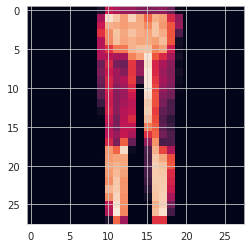

In [126]:
plt.imshow(my_predict.reshape(28,28));

In [127]:
pred_prob = model.predict(my_predict.reshape(1,28,28,1))
pred_prob

array([[2.9009593e-09, 9.9999976e-01, 7.3364911e-11, 2.4124986e-07,
        2.7922475e-09, 4.0480861e-12, 5.6529288e-11, 1.0079548e-14,
        3.2372059e-12, 4.5514401e-11]], dtype=float32)

In [128]:
y_pred = np.argmax(pred_prob)
y_pred

1

In [129]:
model.save("cnn-1.h5")

In [130]:
model=tf.keras.models.load_model('cnn-1.h5')

In [131]:
pred=model.predict(np.expand_dims(X_test[47],axis=0))

In [132]:
np.argmax(pred)

1

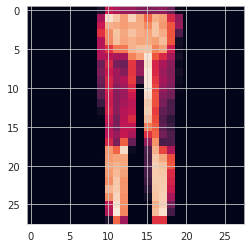

In [136]:
plt.imshow(X_test[3].reshape(28,28));

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___